# Importing Packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_excel("Employee dataset.xlsx", sheet_name ="Sheet2")

# Data Investigation

In [3]:
Data.head()

,Applicant_ID,Sex,Marrital_Status,Current_Role,Applied_Role,Age,Relevant_Exp,Edu_Deg,Edu_Years,Edu_Grade,Edu_Relevancy,Skill_Asmt_Score,Cr/Pr. Salary,Exp. Salary,Immediate_brk_months,Status
0,1001,M,Married,Marketing Analyst,Sr. Data Analyst,27,2,Bsc,3,2,Yes,22,5.5,7.15,2.0,Rejected
1,1002,F,Married,Data Analyst,Sr. Data Analyst,29,2,Msc,5,1,Yes,26,5.2,6.76,NaN,Rejected
2,1003,M,Unmarried,Business Analyst,Sr. Data Analyst,25,2,B.Tech,4,4,Yes,27,5.6,7.28,NaN,Rejected
3,1004,M,Married,Data Engineer,Sr. Data Analyst,27,4,B.E,4,3,Yes,29,7.2,9.36,NaN,Selected
4,1005,M,Married,DBA,Sr. Data Analyst,27,3,M.Tech,6,5,Yes,33,4.6,5.98,NaN,Selected


In [4]:
Data.shape

(100, 16)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant_ID          100 non-null    int64  
 1   Sex                   100 non-null    object 
 2   Marrital_Status       100 non-null    object 
 3   Current_Role          100 non-null    object 
 4   Applied_Role          100 non-null    object 
 5   Age                   100 non-null    int64  
 6   Relevant_Exp          100 non-null    int64  
 7   Edu_Deg               100 non-null    object 
 8   Edu_Years             100 non-null    int64  
 9   Edu_Grade             100 non-null    int64  
 10  Edu_Relevancy         100 non-null    object 
 11  Skill_Asmt_Score      100 non-null    int64  
 12  Cr/Pr. Salary         100 non-null    float64
 13  Exp. Salary           100 non-null    float64
 14  Immediate_brk_months  10 non-null     float64
 15  Status                10

In [6]:
Data.describe()

,Applicant_ID,Age,Relevant_Exp,Edu_Years,Edu_Grade,Skill_Asmt_Score,Cr/Pr. Salary,Exp. Salary,Immediate_brk_months
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,10.000000
mean,1050.500000,28.730000,3.830000,4.850000,3.240000,25.870000,5.062900,6.581770,3.500000
std,29.011492,2.246681,1.371094,1.140397,1.511705,5.213919,1.361359,1.769766,2.368778
min,1001.000000,24.000000,2.000000,3.000000,1.000000,15.000000,3.000000,3.900000,1.000000
25%,1025.750000,27.000000,3.000000,4.000000,2.000000,22.000000,4.000000,5.200000,2.000000
50%,1050.500000,29.000000,4.000000,5.000000,3.000000,26.000000,5.000000,6.500000,2.500000
75%,1075.250000,30.000000,5.000000,6.000000,5.000000,30.000000,6.200000,8.060000,5.500000
max,1100.000000,34.000000,7.000000,6.000000,5.000000,36.000000,7.500000,9.750000,7.000000


# Data Cleaning

In [7]:
Data.drop(columns = ["Immediate_brk_months","Exp. Salary"], inplace = True)

In [8]:
Data.head()

,Applicant_ID,Sex,Marrital_Status,Current_Role,Applied_Role,Age,Relevant_Exp,Edu_Deg,Edu_Years,Edu_Grade,Edu_Relevancy,Skill_Asmt_Score,Cr/Pr. Salary,Status
0,1001,M,Married,Marketing Analyst,Sr. Data Analyst,27,2,Bsc,3,2,Yes,22,5.5,Rejected
1,1002,F,Married,Data Analyst,Sr. Data Analyst,29,2,Msc,5,1,Yes,26,5.2,Rejected
2,1003,M,Unmarried,Business Analyst,Sr. Data Analyst,25,2,B.Tech,4,4,Yes,27,5.6,Rejected
3,1004,M,Married,Data Engineer,Sr. Data Analyst,27,4,B.E,4,3,Yes,29,7.2,Selected
4,1005,M,Married,DBA,Sr. Data Analyst,27,3,M.Tech,6,5,Yes,33,4.6,Selected


# EDA

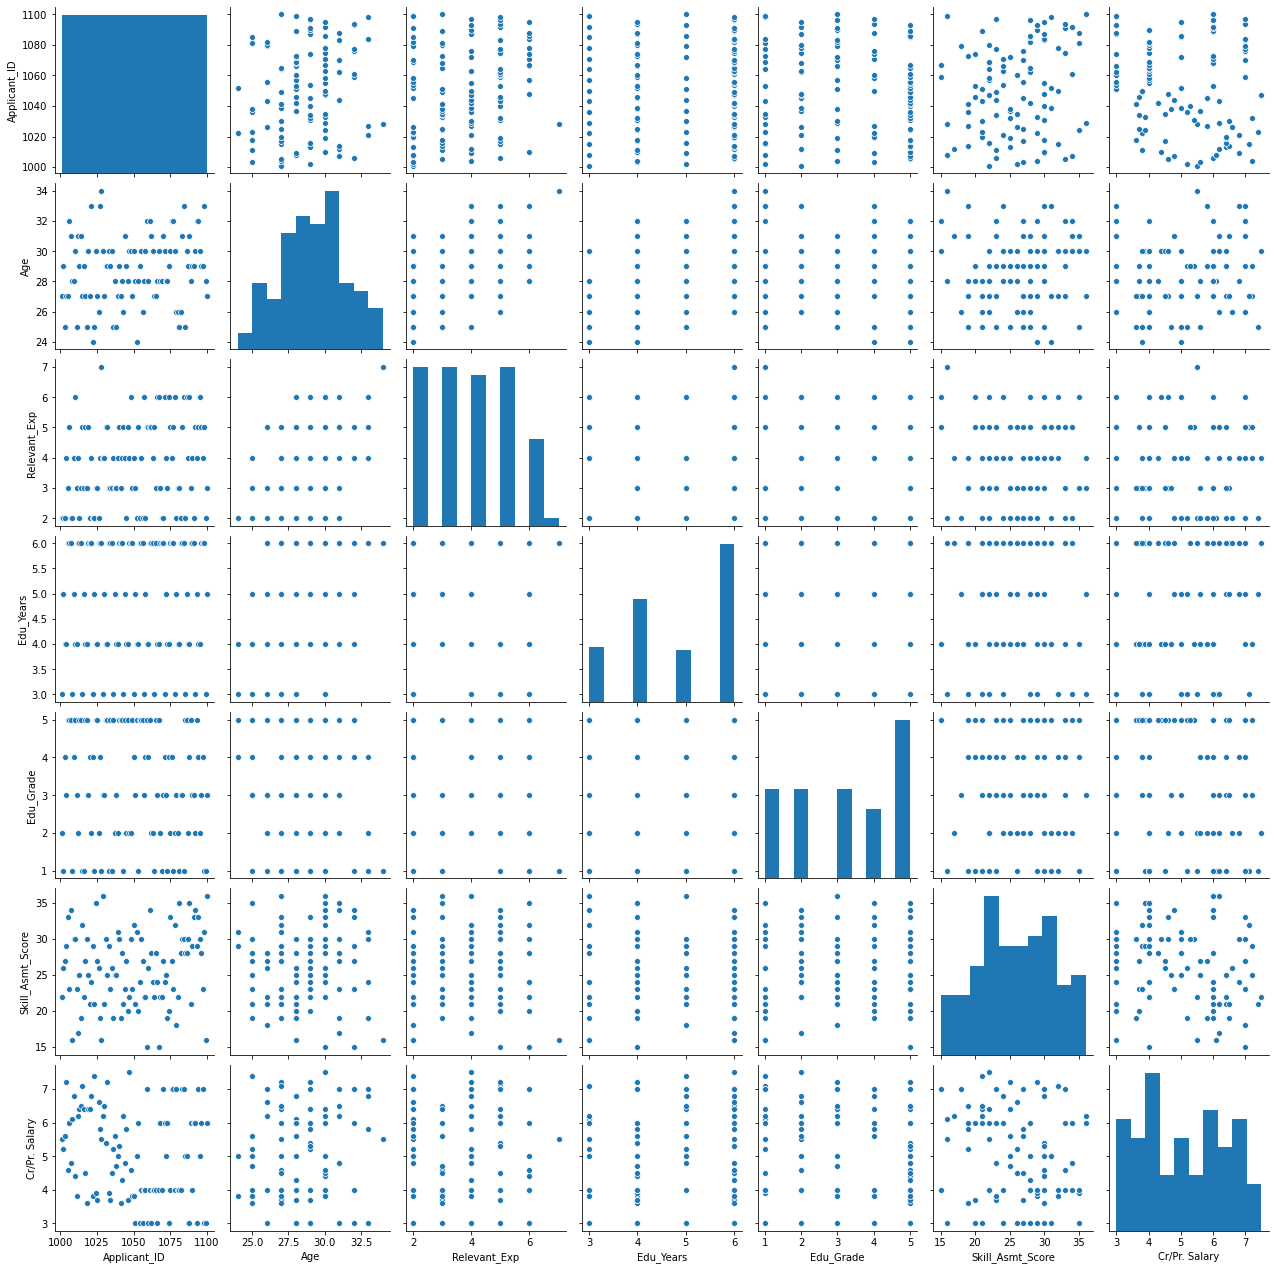

In [9]:
sns.pairplot(Data)

# Data Preparation

In [10]:
data_cat = Data[["Sex", "Marrital_Status", "Current_Role", "Edu_Deg", "Edu_Relevancy", "Status"]]
data_cat.head()

,Sex,Marrital_Status,Current_Role,Edu_Deg,Edu_Relevancy,Status
0,M,Married,Marketing Analyst,Bsc,Yes,Rejected
1,F,Married,Data Analyst,Msc,Yes,Rejected
2,M,Unmarried,Business Analyst,B.Tech,Yes,Rejected
3,M,Married,Data Engineer,B.E,Yes,Selected
4,M,Married,DBA,M.Tech,Yes,Selected


In [11]:
# label the categorical variables using labelencoder

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)
data_cat = data_cat.apply(lambda x: d[x.name].fit_transform(x))

data_cat.head()

,Sex,Marrital_Status,Current_Role,Edu_Deg,Edu_Relevancy,Status
0,1,1,4,2,1,0
1,0,1,2,6,1,0
2,1,2,0,1,1,0
3,1,1,3,0,1,1
4,1,1,1,4,1,1


In [12]:
Data.drop(columns = ["Sex", "Marrital_Status", "Current_Role", "Edu_Deg", "Edu_Relevancy", "Status"],inplace = True)

In [13]:
Data[["Sex", "Marrital_Status", "Current_Role", "Edu_Deg", "Edu_Relevancy", "Status"]] = data_cat[["Sex", "Marrital_Status", "Current_Role", "Edu_Deg", "Edu_Relevancy", "Status"]]

In [14]:
Data.drop(columns = ["Applicant_ID","Applied_Role"],inplace = True)

In [15]:
Data.head()

,Age,Relevant_Exp,Edu_Years,Edu_Grade,Skill_Asmt_Score,Cr/Pr. Salary,Sex,Marrital_Status,Current_Role,Edu_Deg,Edu_Relevancy,Status
0,27,2,3,2,22,5.5,1,1,4,2,1,0
1,29,2,5,1,26,5.2,0,1,2,6,1,0
2,25,2,4,4,27,5.6,1,2,0,1,1,0
3,27,4,4,3,29,7.2,1,1,3,0,1,1
4,27,3,6,5,33,4.6,1,1,1,4,1,1


In [16]:
# Importing StandardScaler from scikit-learn

from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
# Standardizing the data apart from the Class column

Data_scaled = pd.DataFrame(sst.fit_transform(Data.drop('Status',axis=1)))

# Adding the Class column back to the DataFrame
Data_scaled['Status'] = Data.Status

Data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,Status
0,-0.773904,-1.341425,-1.630415,-0.824398,-0.745983,0.322694,0.799590,-0.502519,1.414214,-0.508755,1.061913,0
1,0.120783,-1.341425,0.132196,-1.489235,0.025059,0.101216,-1.250641,-0.502519,0.000000,1.486363,1.061913,0
2,-1.668591,-1.341425,-0.749110,0.505276,0.217819,0.396520,0.799590,1.507557,-1.414214,-1.007535,1.061913,0
3,-0.773904,0.124613,-0.749110,-0.159561,0.603340,1.577737,0.799590,-0.502519,0.707107,-1.506314,1.061913,1
4,-0.773904,-0.608406,1.013501,1.170113,1.374383,-0.341741,0.799590,-0.502519,-0.707107,0.488804,1.061913,1


In [17]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split

X = Data_scaled.drop("Status", axis = 1)
y = Data_scaled["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [18]:
# Checking the selected job applicants %

selected = (sum(Data['Status'])/len(Data['Status'].index))*100
selected

42.0

In [19]:
X_test

,0,1,2,3,4,5,6,7,8,9,10
37,-1.668591,-0.608406,-0.749110,-0.159561,-0.167702,-0.267915,-1.250641,-0.502519,-1.414214,-1.007535,-0.941697
62,0.568126,0.124613,1.013501,-0.824398,-0.360462,-0.784697,0.799590,1.507557,-1.414214,0.987583,-0.941697
26,1.910156,0.124613,1.013501,0.505276,-1.324265,0.544172,0.799590,1.507557,0.000000,-0.009976,-0.941697
41,-0.326561,0.124613,1.013501,1.170113,0.410580,-0.563219,-1.250641,1.507557,0.000000,0.987583,-0.941697
35,-1.668591,0.124613,-1.630415,1.170113,-1.324265,0.101216,-1.250641,1.507557,1.414214,-0.508755,1.061913
25,-1.221247,-1.341425,1.013501,-0.824398,0.025059,1.134781,-1.250641,-0.502519,1.414214,0.488804,-0.941697
36,-0.326561,-0.608406,0.132196,-0.824398,-0.167702,0.396520,0.799590,-0.502519,0.000000,1.486363,-0.941697
33,0.120783,-0.608406,1.013501,1.170113,-0.553223,-1.006176,-1.250641,-0.502519,0.707107,-0.009976,1.061913
77,0.568126,1.590651,-1.630415,-0.824398,1.181622,-0.784697,0.799590,1.507557,-1.414214,-0.508755,-0.941697
21,-2.115934,-1.341425,-1.630415,0.505276,0.603340,-0.932350,-1.250641,1.507557,0.000000,-0.508755,-0.941697


# Model Building

In [20]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)


In [21]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0])

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [23]:
print('Accuracy: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy: 0.97
